# Project Introduction

This objective of this project is to uncover insights into the shopping habits of Instacart customers. It is an explotatory data analysis (EDA) that I conducted as part of my coursework in TripleTen's Data Science Bootcamp Program.

These data sources were originally published by Instacart on Kaggle for a public competition. A description of the data sources this project utilizes is provided below:

**Orders**
*instacart_orders.csv: each row corresponds to one order on the Instacart app*
- 'order_id': ID number that uniquely identifies each order
- 'user_id': ID number that uniquely identifies each customer account
- 'order_number': the number of times this customer has placed an order
- 'order_dow': day of the week that the order placed (which day is 0 is uncertain)
- 'order_hour_of_day': hour of the day that the order was placed
- 'days_since_prior_order': number of days since this customer placed their previous order

**Products**
*products.csv: each row corresponds to a unique product that customers can buy*
- 'product_id': ID number that uniquely identifies each product
- 'product_name': name of the product
- 'aisle_id': ID number that uniquely identifies each grocery aisle category
- 'department_id': ID number that uniquely identifies each grocery department category

**Order_products**
*order_products.csv: each row corresponds to one item placed in an order*
- 'order_id': ID number that uniquely identifies each order
- 'product_id': ID number that uniquely identifies each product
- 'add_to_cart_order': the sequential order in which each item was placed in the cart
- 'reordered': 0 if the customer has never ordered this product before, 1 if they have


**Aisles**
*aisles.csv*
- 'aisle_id': ID number that uniquely identifies each grocery aisle category
- 'aisle': name of the aisle

**Departments**
*departments.csv*
- 'department_id': ID number that uniquely identifies each grocery department category
- 'department': name of the department

# Load Files and Explore Data

### Read CSV Files and Import Libraries

In [1]:
#import libraries needed for project
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# read instacart_orders csv
orders_df = pd.read_csv('instacart_orders.csv',sep=';')

# read products csv
products_df = pd.read_csv('products.csv', sep=';')

# read order_products csv
order_products_df = pd.read_csv('order_products.csv',sep=';')

# read departments csv
departments_df = pd.read_csv('departments.csv',sep=';')

# read aisles csv
aisles_df = pd.read_csv('aisles.csv',sep=';')

### Explore Orders Table

In [2]:
# look at a sample of orders_df
print(f"Five sample rows of orders_df data:\n\n", orders_df.sample(5),"\n")

# get info about order_df
display(orders_df.info()) 

Five sample rows of orders_df data:

         order_id  user_id  order_number  order_dow  order_hour_of_day  \
72992    3341132    29058            32          2                 12   
8932      557823   180861             3          0                 11   
157686   2805966   141248             2          5                  9   
229066   2860447   152305             9          3                 11   
321982   2519497   167862            28          1                  8   

        days_since_prior_order  
72992                      1.0  
8932                      30.0  
157686                     7.0  
229066                     2.0  
321982                     7.0   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64

None

The only column with (clear) missing values is days_since_prior_order, which may make sense given that there is no real value for this if it was a customer's first order.


### Explore Products Table

In [45]:
#  look at a sample of products_ df
print(f"Five sample rows of products_df data:\n", products_df.sample(5))

# get info about products_df
print(f"\nInfo about products_df:")
products_df.info() 

# describe products_df
print(f"\nDescribe products_df:")
products_df.describe() 

Five sample rows of products_df data:
        product_id                            product_name  aisle_id  \
41007       41008           Original Moisture Body Lotion       127   
21454       21455          Perfect Postnatal Multivitamin        47   
22570       22571  100% Whole Wheat Cinnamon with Raisins       112   
42928       42929                  Shredded Asiago Cheese        21   
35408       35409            Chardonnay- California- 2012        62   

       department_id  
41007             11  
21454             11  
22570              3  
42928             16  
35408              5  

Info about products_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtype

,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


I got info about the products_df and confirmed that the product_name column is the only column with missing values. I also described products_df and can confirm that the min value for product_id, aisle_id, and department_id are all greater than 0 since a value of 0 could have potentially represented missing values.

### Explore Order_products Table

In [4]:
#  look at a sample of order_products_df 
print(f"Five sample rows of order_products data:\n", order_products_df.sample(5))

# get info about the df
print(f"\nInfo about order_products_df:") 
order_products_df.info(show_counts=True)

# describe order_products_df
print(f"\nDescribe order_products_df:")
order_products_df.describe()

Five sample rows of order_products data:
          order_id  product_id  add_to_cart_order  reordered
1282130     64536       19057                2.0          1
2656836   1615808       16254                5.0          0
1830694    169944       17173                8.0          0
3751220   1727077       16215                3.0          0
4475965   1816942        6532                1.0          1

Info about order_products_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

Describe order_products_df:


,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


I got information about the order_products_df and looked at rows that had missing values for the add_to_cart_order_column. While missing values represent less than 0.02% of total values, and therefore it would be not harm this analysis to drop rows with missing values, I decided to keep them so that I could get an accurate count of total products ordered, by product, if needed later in my analysis.

### Explore Departments Table

In [5]:
# look at a sample of departments_df 
print(f"Five sample rows of departments_df data:\n", departments_df.sample(5))

# get info about departments_df
print(f"\nInfo about departments_df:")
departments_df.info()

Five sample rows of departments_df data:
     department_id     department
20             21        missing
3               4        produce
14             15   canned goods
6               7      beverages
5               6  international

Info about departments_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


The departments_df DataFrame is as expected with no missing values.

### Explore Aisles Table

In [6]:
# look at a sample of aisles_df 
print(f"Five sample rows of aisles_df data:\n", aisles_df.sample(5))

# get info about aisles_df
print(f"\nInfo about aisles_df:")
aisles_df.info()

Five sample rows of aisles_df data:
      aisle_id                         aisle
69         70                     digestion
76         77                   soft drinks
44         45               candy chocolate
67         68  bulk grains rice dried goods
108       109                     skin care

Info about aisles_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


The aisles_df DataFrame is as expected with no missing values.

## Find and remove duplicate values

### `orders` data frame

In [7]:
# Check for duplicated orders
print("Number of duplicated orders:",orders_df.duplicated().sum())

Number of duplicated orders: 15


In [8]:
# Check for all orders placed Wednesday at 2:00 AM
wed_twoam_orders = orders_df[(orders_df['order_hour_of_day'] == 2) & (orders_df['order_dow'] == 2)]
n_rows_wed_2am, n_cols_wed_2am = wed_twoam_orders.shape

print(f"There are {n_rows_wed_2am} orders placed Wednesday at 2:00 AM.")

There are 136 orders placed Wednesday at 2:00 AM.


I determined that the day of the week value for Wednesday was 2 after consulting [this pandas documentation about datetime components](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components).

In [9]:
# Remove duplicate orders
orders_df = orders_df.drop_duplicates().reset_index(drop=True)

I dropped these duplicates because they were clear duplicates that impacted the quality of the dataset.

In [10]:
# Double check for duplicate rows
print("Now there are",orders_df.duplicated().sum(),"duplicate orders.")

Now there are 0 duplicate orders.


In [11]:
# Double check for duplicate order IDs only
print("Number of duplicate order IDs:",orders_df['order_id'].duplicated().sum())

Number of duplicate order IDs: 0


### `products` data frame

In [12]:
# Check for fully duplicate rows
print("Number of duplicate rows:",products_df.duplicated().sum())

Number of duplicate rows: 0


In [13]:
# Check for just duplicate product IDs
print("Number of duplicate product IDs:",products_df['product_id'].duplicated().sum())

Number of duplicate product IDs: 0


In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
unq_products = products_df['product_name'].str.lower().duplicated().sum()
print("Number of duplicate product_name values:",unq_products)

Number of duplicate product_name values: 1361


In [15]:
# Check for duplicate product names that aren't missing
non_na_prod_names = products_df['product_name'].str.lower().value_counts()
dup_prod_names = non_na_prod_names[non_na_prod_names > 1]

print(f"There are {dup_prod_names.count()} non-missing duplicate product names.\n\nHere are the duplicate product names: \n\n{dup_prod_names}")

There are 103 non-missing duplicate product names.

Here are the duplicate product names: 

product_name
green tea with ginseng and honey                                        3
carrot and celery sticks                                                2
apricot energy bar                                                      2
top the tater chive & onion sour cream                                  2
proactive health indoor weight & hairball care with chicken cat food    2
                                                                       ..
cauliflower head                                                        2
half and half                                                           2
original bbq sauce                                                      2
spreadable butter with canola oil                                       2
mandarin oranges in light syrup                                         2
Name: count, Length: 103, dtype: int64


I decided not to process the non-missing, duplicate product names since each value has a unique product_id associated with it. It is very possible that each non-missing, duplicate product name could be meaningfully differentiated across instances. For example, the 'bag of oranges' product name occurs twice, but may be produced by different brands or contain different quantities i.e. a bag or ten oranges vs. a bag of twenty oranges.

### `departments` data frame

In [16]:
# Check for fullly duplicate rows
print("Number of duplicate rows:",departments_df.duplicated().sum())

Number of duplicate rows: 0


In [17]:
# Double check for any other tricky duplicates
departments_df['department'].str.lower().value_counts()
                     

department
frozen             1
meat seafood       1
deli               1
snacks             1
babies             1
household          1
dairy eggs         1
canned goods       1
breakfast          1
pantry             1
personal care      1
other              1
bulk               1
dry goods pasta    1
pets               1
beverages          1
international      1
alcohol            1
produce            1
bakery             1
missing            1
Name: count, dtype: int64

While there aren't any obvious tricky duplicates, I see departments 'missing' and 'other' which both represent unknown/non-specific departments. I could replace the value 'missing' to also be 'other' but am choosing not to unless it makes sense to do so later in my analysis--it doesn't seem important to do this now and it could remove the ability to identify an issue in the data quality i.e. the prevalence of missing department values.

### `aisles` data frame

In [18]:
# Check for fullly duplicate rows
print("Number of duplicate rows:",aisles_df.duplicated().sum())

Number of duplicate rows: 0


In [19]:
# Double check for any other tricky duplicates - count unique aisle values after converting to lowercase string
aisles_df['aisle'].str.lower().duplicated().sum()

np.int64(0)

While some values for the column aisle appear slightly redundant, they are not clearly implicit duplicates and order some differentiated level of specificity from one another. There are values of 'missing' and 'other' as well--I could replace the value 'missing' to also be 'other' but am choosing not to unless it makes sense to do so later in my analysis. It doesn't seem important to do this now and and it could remove the ability to identify an issue in the data quality i.e. the prevalence of missing aisle values.

### `order_products` data frame

In [20]:
# Check for fullly duplicate rows
print("Number of duplicate rows:",order_products_df.duplicated().sum())

Number of duplicate rows: 0


In [21]:
# Double check for any other tricky duplicates
order_products_df[['order_id','product_id']].duplicated().sum()

np.int64(0)

There are no tricky duplicates present.

## Find and remove missing values


### `products` data frame

In [22]:
'''
Are all of the missing product names associated with aisle ID 100?
'''

# show missing values in the dataframe
print("Total missing values in products_df:")
display(products_df.isna().sum())

#get rows with missing product_name values
miss_product_name = products_df[products_df['product_name'].isna()]

# get total number of missing product_name values
print("Total missing product_name values by aisle_id:")
miss_product_name.groupby('aisle_id')['product_name'].value_counts(dropna=False)

Total missing values in products_df:


product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Total missing product_name values by aisle_id:


aisle_id  product_name
100       NaN             1258
Name: count, dtype: int64

All of the missing product names are associated with aisle ID 100. I summed the total number of missing values in the df and saw there were 1,258 missing product_name values. I then filtered the df to get rows where product_name had missing values and assigned it to the variable miss_product_name. Lastly, I grouped the count of missing product_name values using value_counts(dropna=False) and grouped them by aisle_id to confirm all 1,258 missing values are associated with aisle_id 100.

In [23]:
'''
Are all of the missing product names associated with department ID 21?
'''

# get total number of missing product_name values
print("Total missing product_name values by department_id:")
miss_product_name.groupby('department_id')['product_name'].value_counts(dropna=False)

Total missing product_name values by department_id:


department_id  product_name
21             NaN             1258
Name: count, dtype: int64

I used the same approach as I did with aisle_id above to confirm that all 1,258 missing product_name values were associated with department_id 21 except that I grouped by department_id instead.

In [24]:
'''
What is this aisle and department?
'''

# get aisle name from aisles_df
aisle100 = aisles_df[aisles_df['aisle_id'] == 100].iloc[0,1]

# get department name from departments_df
department21 = departments_df[departments_df['department_id'] == 21].iloc[0,1]

print(f"Aisle ID 100 is the {aisle100} aisle. Department ID 21 is the {department21} department.")

Aisle ID 100 is the missing aisle. Department ID 21 is the missing department.


In [25]:
# Fill missing product names with 'Unknown'
products_df['product_name'] = products_df['product_name'].fillna('Unknown')

#verify product_name no longer has missing values
# products_df.info() # did not print due to notebook data rate limits

I used the fillna() method to fill in missing product_name values with the string 'Unknown' and assigned the result back to the product_name col in the products_df dataframe.

### `orders` data frame

In [26]:
'''
Are there any missing values where it's not a customer's first order?
'''


# check for missing values among repeat orders
display(orders_df[(orders_df['order_number'] != 1)].isna().sum())
print("There are not any missing values for repeat orders (order_number != 1).")

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

There are not any missing values for repeat orders (order_number != 1).


To confirm, I filtered orders_df to only look at orders that weren't a customer's first order and then checked if there were any missing rows within the filtered df using the sum of the isna() method since it can sum boolean values (in this case, a missing value would register as 1 or True).

### `order_products` data frame

In [27]:
'''
What are the min and max values in this column?
'''

# describe order_products DataFrame
print(order_products_df.describe())

           order_id    product_id  add_to_cart_order     reordered
count  4.545007e+06  4.545007e+06       4.544171e+06  4.545007e+06
mean   1.711166e+06  2.558084e+04       8.351669e+00  5.905025e-01
std    9.850955e+05  1.409552e+04       7.080368e+00  4.917411e-01
min    4.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.608170e+05  1.353500e+04       3.000000e+00  0.000000e+00
50%    1.711530e+06  2.527200e+04       6.000000e+00  1.000000e+00
75%    2.561311e+06  3.793500e+04       1.100000e+01  1.000000e+00
max    3.421079e+06  4.969400e+04       6.400000e+01  1.000000e+00


For add_to_cart_order, the min value is 1 and the max value is 64.
For reordered, the min value is 0 and the max value is 1.

In [28]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
na_atc_orderids = order_products_df[order_products_df['add_to_cart_order'].isna()]['order_id']

In [29]:
'''
Do all orders with missing values have more than 64 products?
'''

# find rows in order_products_df where order_id is in na_atc_orderids
ordrs_with_missing_atc = order_products_df[order_products_df['order_id'].isin(na_atc_orderids)]

# count number of products in ordrs_with_missing_atc grouped by order_id
ordrs_with_missing_atc = ordrs_with_missing_atc.groupby('order_id')['product_id'].count().sort_values()
ordrs_with_missing_atc.name = 'count_products'
display(ordrs_with_missing_atc)

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: count_products, Length: 70, dtype: int64

Yes, all orders with missing add_to_cart_order values have more than 64 products. First, I got unique order_id values from the dataframe that had 1+ NaN add_to_cart_order values. Then I found rows in the order_products dataframe where order_id was was in the list of unique values found before. Then I grouped by order_id,counted the number of products per order, and sorted the result. The minimum value was 65 so I know all of the orders with missing add_to_cart_order values have more than 64 products.

In [30]:
# Replace missing values with 999 and convert column to integer type
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(999).astype('int')

# Verify missing values were filled
order_products_df['add_to_cart_order'].sort_values(ascending=False)

# Verify missing values were converted as expected
order_products_df.info(show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


I used the fillna() method to fill missing values for the add_to_cart_order col with the int value 999 instead.

## Conclusion About Missing Data in the Data Set

*Conclusions about missing data in the data set and what was done to address the missing data:*
- The products_df has missing product_name values, but they are all associated with aisle_id 100 and department_id 21, which are the ‘missing’ aisle and ‘missing’ department, respectively. This was addressed, but filling missing product_name values with a value of ‘Unknown’ instead.


- In the orders_df, there are missing days_since_prior_order values, but this would be expected if it was a customer’s first order. I confirmed there were no missing values where it wasn’t a customer’s first order.


- In the order_products_df, I confirmed that the values for order_dow and order_hour_of_day were logical and as expected. There were missing values for add_to_cart_order, but I confirmed these values were only missing for order_ids with more than 64 products, which is an uncommon use case; perhaps Instacart did not track add_to_cart order beyond this value for a specific business reason. I replaced the missing values in add_to_cart_order with 999 to work with the data more easily with a value I could easily exclude as an outlier if necessary.

### Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [31]:
print(f"For the 'order_hour_of_day' column, the min value is {orders_df['order_hour_of_day'].min()} and the max value is {orders_df['order_hour_of_day'].min()}.")

For the 'order_hour_of_day' column, the min value is 0 and the max value is 0.


In [32]:
print(f"For the 'order_dow' column, the min value is {orders_df['order_dow'].min()} and the max value is {orders_df['order_dow'].max()}.")

For the 'order_dow' column, the min value is 0 and the max value is 6.


The min and max values for order_hour_of_day and order_dow are sensible and as expected.

### What time of day do people shop for groceries?

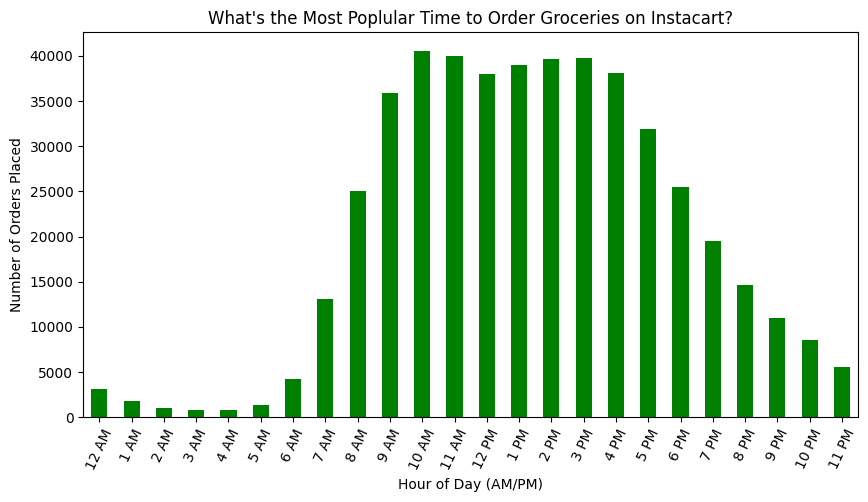

In [33]:
# count orders by grouped 'order_hour_of_day'
orders_by_hod = orders_df.groupby('order_hour_of_day')['order_id'].nunique()

# create list of order_hour_of_day in 12hr am/pm str format
order_hour_of_day_12hr = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM']

# replace orders_by_hod index with values from list order_hour_of_day_12hr for use as non-numeric xlabels in bar chart
orders_by_hod.index = order_hour_of_day_12hr

orders_by_hod.plot(x=orders_by_hod.index,
                   kind='bar',
                   xlabel='Hour of Day (AM/PM)',
                   ylabel='Number of Orders Placed',
                   title='What\'s the Most Poplular Time to Order Groceries on Instacart?',
                   rot=65,
                   figsize=(10,5),
                   color='green'
                  )

plt.show()

10 AM is the most popular hour. However, 9AM - 5PM are all relatively popular times.

### What day of the week do people shop for groceries?

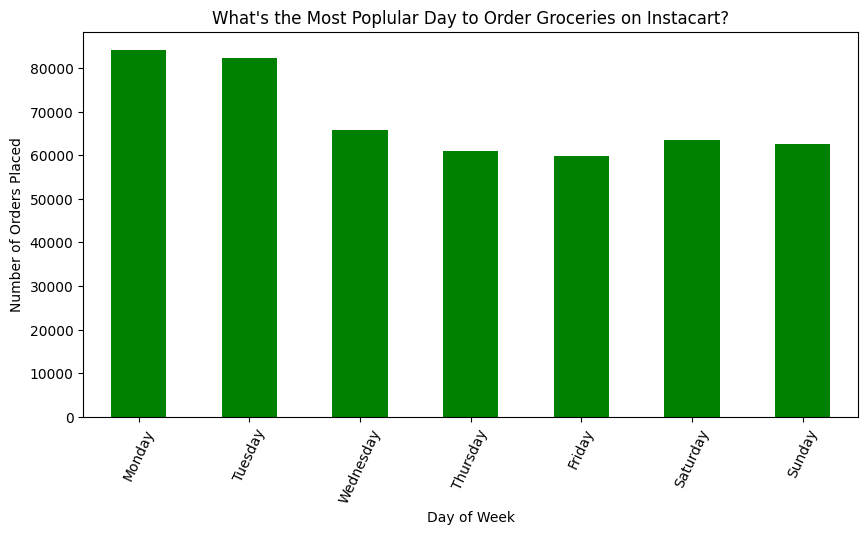

In [46]:
# group order count by order_dow
orders_by_dow = orders_df.groupby('order_dow')['order_id'].count()

# create list of order_dow names
order_dow_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# replace orders_by_dow index with order_dow_name list so bar chart x-axis has non-numeric dow labels
orders_by_dow.index = order_dow_name

# plot bar chart
orders_by_dow.plot(x=orders_by_dow.index,
                   kind='bar',
                   xlabel='Day of Week',
                   ylabel='Number of Orders Placed',
                   title='What\'s the Most Poplular Day to Order Groceries on Instacart?',
                   rot=65,
                   figsize=(10,5),
                   color='green'
                  )

plt.show()

Monday is the most popular day to order, yet Tuesday is a close second!


It looks consumers tend to place their Instacart orders toward the start of the week.

### How long do people wait until placing another order?

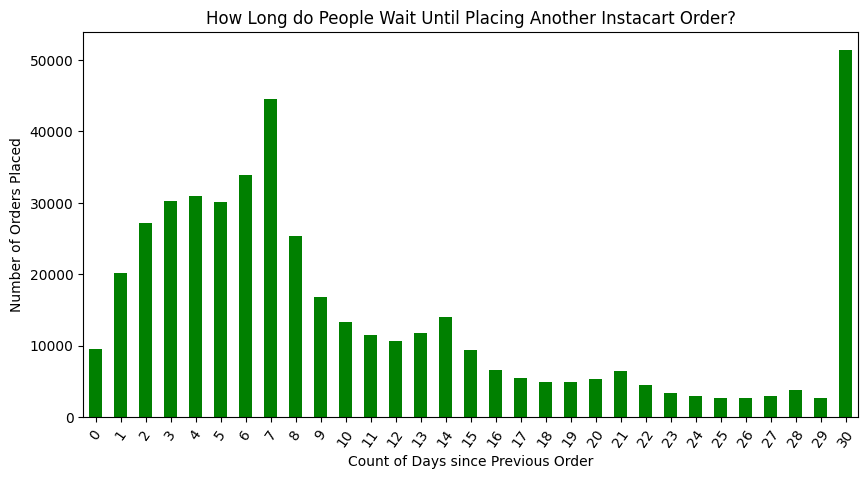

In [35]:
# group order count by 'days_since_prior_order'
orders_by_days_prior = orders_df.groupby('days_since_prior_order')['order_id'].count()

# set index ('days_since_prior_order') to int
orders_by_days_prior.index = orders_by_days_prior.index.astype('int')

# plot bar chart
orders_by_days_prior.plot(x=orders_by_days_prior.index,
                   kind='bar',
                   xlabel='Count of Days since Previous Order',
                   ylabel='Number of Orders Placed',
                   title='How Long do People Wait Until Placing Another Instacart Order?',
                   rot=55,
                   figsize=(10,5),
                   color='green'
                  )

plt.show()

- Most people wait 30 days (about a month) to place a subsequent Instacart order.
- Waiting 7 days (a week) is the second most common occurrence.
- The maximum time between two orders is 30 days while the mimimum time is 0 days.
  - In this case, 0 represents customers placing multiple orders in a day.**

### Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

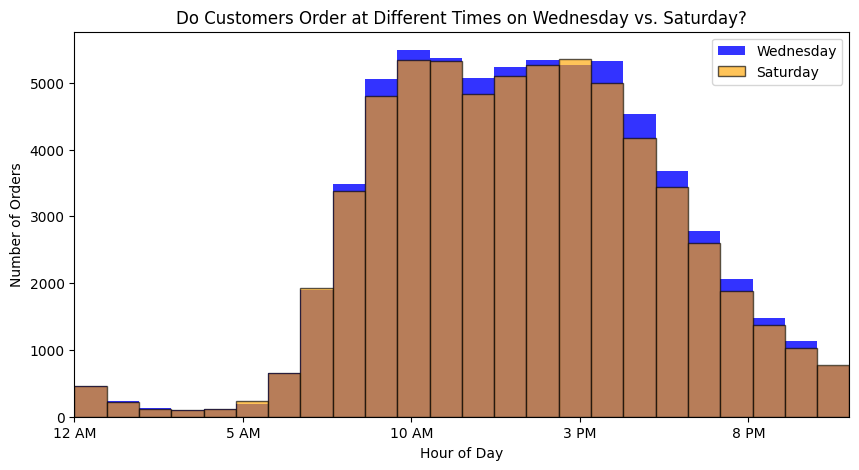

In [36]:
# plot histogram showing distribution of order count by order hour of day on Wednesday
orders_df[orders_df['order_dow'] == 2]['order_hour_of_day'].plot(
    kind='hist',
    alpha=.8,
    xlim=[0,23],
    figsize=(10,5),
    color='blue',
    bins=24)

# plot histogram showing distribution of order count by order hour of day on Saturday
orders_df[orders_df['order_dow'] == 5]['order_hour_of_day'].plot(
    kind='hist',
    alpha=.65, 
    edgecolor='black',
    color='orange',
    bins=24)

# set y-axis label
plt.ylabel('Number of Orders')

# set x-axis label
plt.xlabel('Hour of Day')

# set x-axis ticks to display order_hour_of_day in a reader-friendly, 12hr am/pm format 
plt.xticks(ticks=[0, 5, 10, 15, 20], labels=['12 AM', '5 AM', '10 AM', '3 PM', '8 PM'])

# set legend
plt.legend(['Wednesday','Saturday'])

# set title
plt.title('Do Customers Order at Different Times on Wednesday vs. Saturday?')

plt.show()

Overall, customers typically place more orders each hour on Wednesdays compared to Saturdays.

Wednesday's increased ordering behavior is driven by the hours 8 AM through 10 PM, however
Saturday has more orders than Wednesday across several hours including 5 AM, 7 AM, and 3 PM.

### What's the distribution for the number of orders per customer?

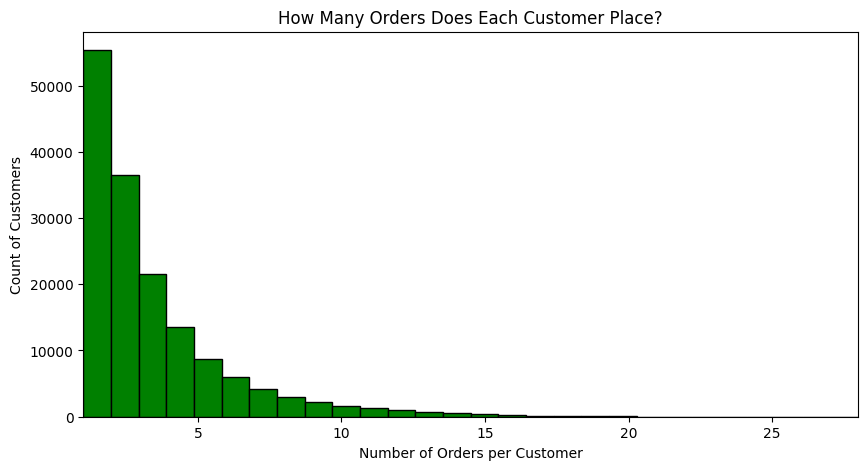

35.2% of users place 1 order while 86.2% (a high majority) of customers place 5 or fewer orders.


In [37]:
# group user_ids by count of orders
orders_per_cust = orders_df.groupby('user_id')['order_id'].count()

# rename series column
orders_per_cust.name = 'orders_per_user'

# get count of users by orders_per_cust
num_users_per_ordercnt = orders_per_cust.value_counts()

# create new df from series -> make current index a new column and then reset the index of the df
percent_users_dist = num_users_per_ordercnt.reset_index()

# rename df columns
percent_users_dist.columns = ['orders_per_customer','count_users']

# create % distibution of total users column for use in summary analysis
percent_users_dist['percent_total_users'] = (percent_users_dist['count_users']/percent_users_dist['count_users'].sum())

# plot distribution of order count per customer
orders_per_cust.plot(
    kind='hist',
    figsize=(10,5),
    color='green',
    edgecolor='black',
    xlim=(1,28),
    bins=28)

# set y-axis label
plt.ylabel('Count of Customers')

# set x-axis label
plt.xlabel('Number of Orders per Customer')

# set title
plt.title('How Many Orders Does Each Customer Place?')

plt.show()
print(f"{percent_users_dist.iloc[0,2]:.1%} of users place 1 order while {percent_users_dist.iloc[0:5,2].sum():.1%} (a high majority) of customers place 5 or fewer orders.")

In the above graph, I created a bin for every possible value of orders per user since there is a meaningful differentiation between users with 1 order and 2 orders, for example. I made my x axis extend up to the max tick value of orders per user (28 orders) to showcase the range of orders per customer, but also could have cut it off after somewhere between 15 and 20 to only highlight the majority of easily visible data.

### What are the top 20 popular products? Display their id and name.

In [38]:
# get product name from products_df
merged_orderprd_prd = order_products_df.merge(products_df,how='left',on='product_id')

# drop unneccessary columns
merged_orderprd_prd = merged_orderprd_prd.drop(['add_to_cart_order','reordered','aisle_id','department_id'], axis='columns')

# get count of ordered products grouped by product
prod_count = merged_orderprd_prd.groupby(['product_name','product_id'])['product_name'].count()

# rename series column
prod_count.name = 'count_ordered'

# sort series in descending order by count ordered per product
prod_count = prod_count.sort_values(ascending=False)

# index to store top 20 product, turn series into DataFrame, and then reset the index
output = prod_count.iloc[0:20].reset_index()

print("Here are the top 20 most popular products ordered on Instacart:\n")
# print only the product_name and product_id for the top 20 products
print(output.loc[:,['product_name','product_id']].to_string(index=False))


Here are the top 20 most popular products ordered on Instacart:

            product_name  product_id
                  Banana       24852
  Bag of Organic Bananas       13176
    Organic Strawberries       21137
    Organic Baby Spinach       21903
    Organic Hass Avocado       47209
         Organic Avocado       47766
             Large Lemon       47626
            Strawberries       16797
                   Limes       26209
      Organic Whole Milk       27845
     Organic Raspberries       27966
    Organic Yellow Onion       22935
          Organic Garlic       24964
        Organic Zucchini       45007
     Organic Blueberries       39275
          Cucumber Kirby       49683
      Organic Fuji Apple       28204
           Organic Lemon        5876
Apple Honeycrisp Organic        8277
  Organic Grape Tomatoes       40706


With the exception of one dairy product (organic whole milk), the top 20 most popular products are produce. Bananas represent the top 2 most popular products with single bananas being the most popluar and bagged organic bananas being the second most popular.

### How many items do people typically buy in one order? What does the distribution look like?

Describe cnt_odr_by_user:

        total_item_count    order_count  avg_items_per_order
count     149626.000000  149626.000000        149626.000000
mean          30.375784       3.007806            10.036562
std           35.873511       2.755336             6.735305
min            1.000000       1.000000             1.000000
25%            9.000000       1.000000             5.000000
50%           18.000000       2.000000             8.750000
75%           38.000000       4.000000            13.333333
max          580.000000      28.000000            81.500000

Instacart customers typically (on average) buy 10 items in one order.


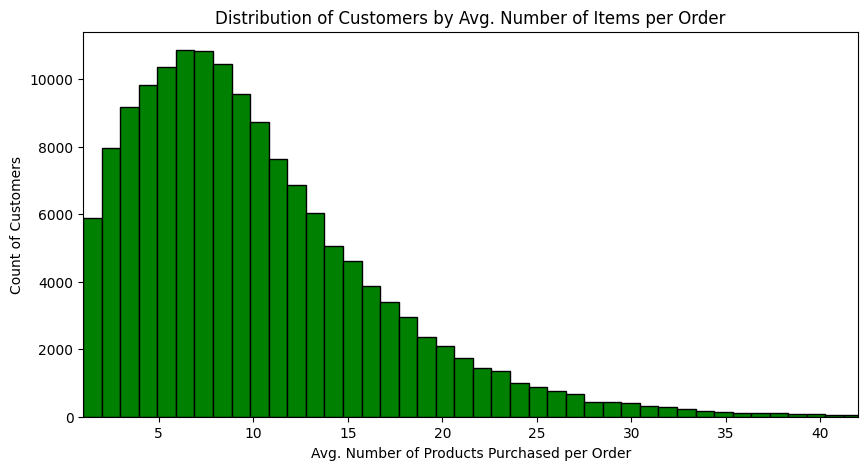

75% of customers place orders with less than 13.3 avg. items per order.


In [39]:
# get all products and orders for each user
merged_odr_odrprod = orders_df.merge(order_products_df,on='order_id')

# drop unnecessary columns
merged_odr_odrprod = merged_odr_odrprod.drop(['add_to_cart_order','reordered','days_since_prior_order','order_hour_of_day','order_dow'], axis='columns')

# make a dictionary for agg() method used below
agg_dict = {'product_id': 'count', 'order_id': 'nunique'}

# designate user_id as the groupby column
grp = merged_odr_odrprod.groupby('user_id')

# apply summary stats from agg_dict for user_id col
cnt_odr_prods_by_user = grp.agg(agg_dict)

# rename cols
cnt_odr_prods_by_user.columns = ['total_item_count','order_count']

# make new df col from calc to get the avg number of items each user ordered per order
cnt_odr_prods_by_user['avg_items_per_order'] = cnt_odr_prods_by_user['total_item_count']/cnt_odr_prods_by_user['order_count']

# describe cnt_odr_prods_by_user to understand min and max values of columns 
# and see if median or mean is a better measure of how many items people typically buy in one order
print("Describe cnt_odr_by_user:\n\n",cnt_odr_prods_by_user.describe()) 

# print answer to to question "How many items do people typically buy in one order?"
print(f"\nInstacart customers typically (on average) buy {cnt_odr_prods_by_user['avg_items_per_order'].mean().astype('int')} items in one order.")

# plot distribution of order count per customer
cnt_odr_prods_by_user['avg_items_per_order'].plot(
    kind='hist',
    figsize=(10,5),
    color='green',
    edgecolor='black',
    bins=82,
    xlim=[1,42]) 

# set y-axis label
plt.ylabel('Count of Customers')

# set x-axis label
plt.xlabel('Avg. Number of Products Purchased per Order')

# set title
plt.title('Distribution of Customers by Avg. Number of Items per Order')

plt.show()
print("75% of customers place orders with less than 13.3 avg. items per order.")


Upon merging (how='left') the orders_df and order_products_df DataFrames together, it was clear that many orders did not have an associated product_id, therefore resulting in 0 total (known) items in those orders. I decided to exclude those orders and therefore did an inner merge instead.

Although I purposely excluded the orders with 0 total (known) items, I saw that many (over 8k) customers only were associated with an order(s) with 0 items. These orders could potentially represent cancelled orders or orders where the customer placed an order for an item(s) that were out of stock. It could also point to an issue with the data in order_products_df--perhaps the product_ids were not being collected properly for some orders. Given the meaningful share of customers with an avg. of 0 items per order, I wanted to comment on this insight.

I chose the mean value of my data, the avg. items per order each customer has, as the overall answer to this question since the mean (10.04) is hardly larger than the median value (8.75). I then converted the mean to an integer to simplify my answer for the reader.

For the histogram representing the distribution of customers by their avg. number of items per order, I made the xlim for my graph 42 because results were not very visible or meaningful to the chart past that point. I made my bin size 82 based on the max value of avg_items_per_order for a user (81.5) so I had a bar to roughly represent each integer value and therefore, visually differentiate the amount of customers who placed orders with an avg. of only one item vs. any other number of items.

### What are the top 20 items that are reordered most frequently? Display their names and product IDs.

In [40]:
# group sum of reordered by product_id
reord_cnt_by_prod = order_products_df.groupby('product_id')['reordered'].sum().sort_values(ascending=False)

# reset index and convert into df
reord_cnt_by_prod = reord_cnt_by_prod.reset_index()

# get product name from products_df
reord_cnt_prod_name = reord_cnt_by_prod.merge(products_df[['product_id','product_name']],on='product_id')

print("Here are the top 20 most reordered products ordered on Instacart:\n")
# print only the product_name and product_id for the top 20 reordered products
print(reord_cnt_prod_name.loc[0:19,['product_name','product_id']].to_string(index=False))


Here are the top 20 most reordered products ordered on Instacart:

            product_name  product_id
                  Banana       24852
  Bag of Organic Bananas       13176
    Organic Strawberries       21137
    Organic Baby Spinach       21903
    Organic Hass Avocado       47209
         Organic Avocado       47766
      Organic Whole Milk       27845
             Large Lemon       47626
     Organic Raspberries       27966
            Strawberries       16797
                   Limes       26209
    Organic Yellow Onion       22935
          Organic Garlic       24964
        Organic Zucchini       45007
          Cucumber Kirby       49683
      Organic Fuji Apple       28204
Apple Honeycrisp Organic        8277
     Organic Blueberries       39275
           Organic Lemon        5876
     Organic Half & Half       49235


Bananas are also the most reordered product! The top 20 most reordered items has quite a bit of overlap with the list of the top 20 popular items; people may be more likely to reorder popular items.

### For each product, what proportion of its orders are reorders?

In [41]:
# get product name and calculate % reorder share
reorder_share = order_products_df.merge(products_df,on='product_id').groupby(['product_id', 'product_name'])['reordered'].mean()*100

# rename columns
reorder_share.name = '% Reorders / Total Orders'

# sort '% Reorders / Total Orders' in descending order for readability of output
output_sorted = reorder_share.sort_values(ascending=False)

# reset_index to turn into df
output_sorted.reset_index()

,product_id,product_name,% Reorders / Total Orders
0,14721,Bone Strength Take Care,100.0
1,20949,Vanilla Sandwich Cookies,100.0
2,6723,Palmiers- Petite,100.0
3,6732,Naturally Sparkling Mineral Water,100.0
4,45088,California Dill Pollen & Garlic Goat Cheese & ...,100.0
...,...,...,...
45568,10485,Caramel Apple Pop,0.0
45569,37690,Calypso Fresh 2X Concentrated ScentSations 166...,0.0
45570,10484,Avocado And Greens,0.0
45571,10474,NuStevia White Stevia Powder,0.0


Some products have a 0% share of reorders out of total orders while other products have a 100% share of reorders out of total orders. It should in theory be impossible for a product to have a 100% share of reorders out of total orders since each product has to be ordered once to be able to be reordered and the first time it's ever ordered would not be a reorder.

I looked at a few examples of products that had a 100% share of reorders out of total orders directly in order_products_df and confirmed they only had row where reordered = 1. The dataset must exclude previous instances of these products being ordered; otherwise, the reordered col values are being collected incorrectly in the data set (original csv files).

### For each customer, what proportion of their products ordered are reorders?

In [42]:
# get product_id and reordered col from order_products_df with an inner merge on order_id
cust_prods = orders_df.merge(order_products_df[['order_id','product_id','reordered']],on='order_id')


# create a pivot table to get the mean of the reordered col
cust_pivot = cust_prods.pivot_table(index='user_id',
                            values='reordered',
                            aggfunc='mean'
                           )

# rename cols
cust_pivot.columns = ['% Reordered Products/Total Products']

# get % values
cust_pivot['% Reordered Products/Total Products'] = cust_pivot['% Reordered Products/Total Products']*100

#sort output for readability in order of % Reordered Products/Total Products descending
cust_pivot = cust_pivot.sort_values(by='% Reordered Products/Total Products',ascending=False)

# reset index for output
cust_pivot.reset_index()

,user_id,% Reordered Products/Total Products
0,137587,100.0
1,173474,100.0
2,13918,100.0
3,62300,100.0
4,62307,100.0
...,...,...
149621,190953,0.0
149622,119371,0.0
149623,63173,0.0
149624,63163,0.0


While some users have never reordered an item, others have only ordered items that they have also reordered. It should theorhetically be impossible for a user to have a share of 100% reorders out of total orders since a user must order a product for a first time before being able to reorder it, but it's clear from checking a few examples that this dataset excludes historical data (it doesn't necessarily contain every user's first order).

### What are the top 20 items that people put in their carts first? 

In [43]:
# filter df to get rows where product was added to cart first
products_added_first = order_products_df[order_products_df['add_to_cart_order'] == 1.0]

# sum total of times item was added to cart first by product_id
count_first_adds_by_prod = products_added_first.groupby('product_id')['add_to_cart_order'].sum()
count_first_adds_by_prod.name = 'count_added_to_cart_first'

# reset index
count_first_adds_by_prod = count_first_adds_by_prod.reset_index()

# get product name from products_df via merge
first_adds_by_prod_name = count_first_adds_by_prod.merge(products_df[['product_id','product_name']],on='product_id',how='left')


# sort in desc order of count of times product was added to cart first
output_sorted = first_adds_by_prod_name.sort_values(by='count_added_to_cart_first',ascending=False)

# rename columns
output_sorted.columns = ['Product ID','Count - Added to Cart First','Product Name']

# reset index
output_sorted = output_sorted.reset_index(drop=True)

# grab top 20 items
output_sorted = output_sorted.iloc[0:20]

# set index to reflect desired range
output_sorted.index = range(1,21)

# print result in desired column order
output_sorted[['Product ID','Product Name','Count - Added to Cart First']]

,Product ID,Product Name,Count - Added to Cart First
1,24852,Banana,15562
2,13176,Bag of Organic Bananas,11026
3,27845,Organic Whole Milk,4363
4,21137,Organic Strawberries,3946
5,47209,Organic Hass Avocado,3390
6,21903,Organic Baby Spinach,3336
7,47766,Organic Avocado,3044
8,19660,Spring Water,2336
9,16797,Strawberries,2308
10,27966,Organic Raspberries,2024


Bananas are also added to the cart first most frequently! The top 20 items that are added to the cart first often is a mix of produce, dairy products, water, and carbonated water.

# Project Conclusion

This project resulted in some very interesting takeaways about consumer shopping behaviors on Instacart.

#### High-level Takeaways:
Instacart customers tend to shop earlier in the week between 9 AM - 5 PM. For customers with more than one order, most place a subseqent order about a month later, but otherwise a majority of customers place another order in a week or less. Produce and dairy milk products are among the most popular products a) in general, b) in terms of the products customers reorder, and c) in terms of the products customers add to their cart first. Notably, bananas took the top spot among all three of the proceeding categories!A high majority of customers place 5 of fewer orders while 35.2% of customers only place 1 order.


#### Let’s take a look at a summary of the specific insights the analysis uncovered:

- *When do consumers shop on Instacart?*
	- 10 AM was the most popular hour to place orders, however most orders occur between 9 AM and 5 PM in general.
	- Monday is the most popular day of the week to place orders, closely followed by Tuesday. 
	- Most people wait 30 days (about a month) to place a subsequent order on Instacart, but 7 days (a week) later was the second most common amount of time between orders. Additionally, it’s more common to place a subsequent order within a week than it is to place a subsequent order anytime after a week but before a month.
	- Ordering behavior by time of day can vary slightly by the day of week the order was placed.
    

- *How frequently do customers place orders and how many products (items) do they buy per order?*
  - 35.2% of users place 1 order while 86.2% (a high majority) of customers place 5 or fewer orders.
  - On average, customers buy 10 items per order. 75% of customers place orders with less than 13.3 avg. items per order.
  - Over 8k customers are associated with orders that have 0 associated products; this could represent orders that were not successfully fulfilled (perhaps the product(s) was out of stock or the order was cancelled) or could represent a data collection issue for the data set. 
  

- *What products do customers order?*:
  - The 20 most popular products customers ordered were mostly produce with the exception of organic whole milk. Bananas were the most popular product!
  - Bananas are also the most reordered product. The top 20 most reordered items overlap quite a bit with the list of the top 20 popular items; Customers may be more likely to reorder popular items.
  - Bananas yet again come in first among the top 20 items that are added to a customer’s cart first. The other products that are most often added to the cart first are a mix of produce, dairy products, water, and carbonated water.
  
#### Note about the limitations of the analysis:
- The dataset used in this analysis clearly excluded some relevant historical data as evidenced by the fact that some products had a 100% proportion of the count of times they were reordered compared to the total count of times they were ordered. The same is true for the proportion of reordered items to total items that an individual customer could have. 
  - As a result, we cannot make accurate conclusions about related data. 
  - We could confirm the exclusion of missing historical data by looking at indivdual cases of missing historical data in the data; for example, the minimum value for the 'order_number' column in the orders file (which reflects the number of times this customer has placed an order) was 8. This tells us that data for orders 1-7 for this customer is not present in the data set.

